In [1]:
import pandas as pd
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
elec_df = pd.read_csv('C:/Users/HOME/Desktop/excel_files/Electricity_Production_By_Source.csv')
elec_df = elec_df.rename(columns={'Electricity from coal (TWh)':'coal', 
                        'Electricity from gas (TWh)':'gas', 
                        'Electricity from hydro (TWh)':'hydro', 
                        'Electricity from other renewables (TWh)':'other renewables',
                        'Electricity from solar (TWh)':'solar', 
                        'Electricity from oil (TWh)':'oil', 
                        'Electricity from wind (TWh)':'wind',
                        'Electricity from nuclear (TWh)':'nuclear',
                        'Year': 'year',
                        'Entity': 'Country name'})
#non-renewable - coal, gas, oil, nuclear
#renewable - hydro, solar, wind, others
happy_df = pd.read_csv('C:/Users/HOME/Desktop/excel_files/world-happiness-report.csv')

In [3]:
happy_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
elec_df = elec_df.dropna(subset=['Code'])
elec_df = elec_df[elec_df['Country name'] != 'World'].reset_index()

In [5]:
#elec_df[elec_df['non_renewable'].isnull()]

In [6]:
#sum(mean_df.isnull().values) #nan values probably comes from not having any soures

In [7]:
pd.set_option('display.max_rows', 2000)

In [8]:
happy_df[happy_df['Country name'] == 'Afghanistan']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [9]:
#train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False) #group by code
happy_df[['Country name', 'Social support']].groupby('Country name', as_index=False).mean().sort_values(by='Social support', ascending=False)

,Country name,Social support
62,Iceland,0.977500
36,Cuba,0.970000
67,Ireland,0.960000
39,Denmark,0.957133
105,New Zealand,0.952929
111,Norway,0.950500
47,Finland,0.949000
6,Australia,0.947357
157,United Kingdom,0.945333
143,Switzerland,0.943600


In [10]:
happy_df[happy_df['Social support'].isnull()]
#sum(happy_df['Social support'].isnull().values)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
112,Bahrain,2014,6.165,10.783,NaN,67.42,NaN,NaN,NaN,NaN,NaN
294,Canada,2007,7.482,10.739,NaN,71.66,0.930,0.249,0.406,0.872,0.257
466,Djibouti,2010,5.006,7.812,NaN,54.30,0.764,-0.058,0.597,NaN,NaN
925,Kuwait,2014,6.180,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN
1164,Morocco,2010,4.383,8.746,NaN,63.50,0.663,-0.162,0.900,NaN,NaN
1310,Oman,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1423,Qatar,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN,NaN,NaN
1426,Qatar,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN,NaN,NaN
1741,Tunisia,2009,5.025,9.197,NaN,64.96,0.781,-0.119,0.722,NaN,NaN


In [11]:
#dummy[dummy['Country name']]
#dummy['Country name'][0]
#dummy.loc[0,'Social support']
#dummy.loc[dummy[dummy['Country name']==happy_df['Country name'][25]].index,'Social support']
#happy_df['Social support'].loc[2]
#happy_df
#happy_df[happy_df['Country name']=='Afghanistan']
#elec_df['Country name']
#happy_df['Country name'][0]
#df[col].replace(np.NaN, dummy.loc[dummy[dummy['Country name']==df['Country name'][i]].index,col])
#dummy['Country name'] == happy_df['Country name']
#happy_df['Social support'].iloc[25]
#fire = dummy.loc[dummy[dummy['Country name']==happy_df['Country name'][25]].index,'Social support']

In [12]:
def complete_elec(df, col):
    df[col] = df[col].replace(np.NaN, df[col].mean())
#df.loc[df['B'] == 3, 'A']
def complete_happy(df, col):
    #global dummy
    dummy = df[['Country name', col]].groupby('Country name', as_index=False).mean().sort_values(by=col, ascending=False)
    for i in range(len(df[col])):
        if math.isnan(df[col][i]):
            df[col].iloc[i] = float(dummy.loc[dummy[dummy['Country name']==df['Country name'][i]].index, col])

    #df[col] = df[col].replace(np.NaN, df[df['Country name']][col].mean())
    #df[col] = df[col].replace(np.NaN, df[df['Country name']==df.loc[df[col]==np.NaN, df['Country name']]][col].mean())
    #df[['Country name', col]].groupby(col, as_index=False).mean().sort_values(by='Country name', ascending=False)

In [13]:
complete_happy(happy_df, 'Log GDP per capita')
complete_happy(happy_df, 'Social support')
complete_happy(happy_df, 'Healthy life expectancy at birth')
complete_happy(happy_df, 'Freedom to make life choices')
complete_happy(happy_df, 'Generosity')
complete_happy(happy_df, 'Perceptions of corruption')
complete_happy(happy_df, 'Positive affect')
complete_happy(happy_df, 'Negative affect')


In [14]:
#complete
complete_elec(elec_df, 'coal')
complete_elec(elec_df, 'gas')
complete_elec(elec_df, 'other renewables')
complete_elec(elec_df, 'oil')

In [15]:
master_df = elec_df.merge(happy_df, on=['year','Country name'], how='inner')

In [16]:
sum(master_df.isnull().values)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  1, 13,  0,
        8, 28,  2,  1])

In [17]:
master_df[master_df['Country name'] == 'Maldives']

,index,Country name,Code,year,coal,gas,hydro,other renewables,solar,oil,...,nuclear,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
992,3285,Maldives,MDV,2018,0.0,0.0,0.0,0.0,0.0,0.605,...,0.0,5.198,9.826,0.913,70.6,0.855,0.024,NaN,NaN,NaN


In [18]:
master_df[master_df.isnull().values]

,index,Country name,Code,year,coal,gas,hydro,other renewables,solar,oil,...,nuclear,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
337,1134,China,CHN,2006,2207.127934,43.548195,414.76900,2.522000,0.0840,53.847957,...,54.844,4.560,8.696,0.747,66.88,0.845700,-0.170643,NaN,0.809000,0.170
338,1135,China,CHN,2007,2571.080178,50.729231,471.35400,2.503000,0.1050,62.727408,...,62.863,4.863,8.824,0.811,67.06,0.845700,-0.176000,NaN,0.817000,0.159
339,1136,China,CHN,2008,2651.488896,52.315751,565.54800,14.859000,0.1520,64.689163,...,69.219,4.846,8.911,0.748,67.24,0.853000,-0.092000,NaN,0.817000,0.147
340,1137,China,CHN,2009,2866.547000,56.559000,571.68200,12.118000,0.3920,69.936000,...,70.050,4.454,8.996,0.798,67.42,0.771000,-0.160000,NaN,0.786000,0.162
341,1138,China,CHN,2010,3260.754000,75.740000,686.73600,16.209000,0.1000,61.788000,...,74.742,4.653,9.092,0.768,67.60,0.805000,-0.133000,NaN,0.765000,0.158
342,1139,China,CHN,2011,3696.100000,108.800000,668.10000,23.400000,0.6000,61.100000,...,87.200,5.037,9.179,0.787,67.76,0.824000,-0.186000,NaN,0.820000,0.134
343,1140,China,CHN,2012,3713.100000,110.300000,855.60000,32.080000,3.6000,70.500000,...,98.300,5.095,9.249,0.788,67.92,0.808000,-0.185000,NaN,0.821000,0.159
344,1141,China,CHN,2013,3980.500000,116.400000,892.10000,38.580000,8.4000,86.400000,...,111.500,5.241,9.319,0.778,68.08,0.805000,-0.158000,NaN,0.836000,0.142
345,1142,China,CHN,2014,3951.000000,133.300000,1060.10000,46.600000,23.5000,97.000000,...,133.200,5.196,9.386,0.820,68.24,0.845700,-0.217000,NaN,0.854000,0.112
346,1143,China,CHN,2015,3897.700000,166.900000,1112.70000,54.000000,39.5000,112.200000,...,171.400,5.304,9.449,0.794,68.40,0.845700,-0.244000,NaN,0.809000,0.171


In [19]:
master_df

,index,Country name,Code,year,coal,gas,hydro,other renewables,solar,oil,...,nuclear,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,8,Afghanistan,AFG,2008,0.000000,0.186000,0.542000,0.000000,0.000000,0.000000,...,0.000000,3.724,7.370000,0.451000,50.800,0.718000,0.168000,0.882000,0.518000,0.258000
1,9,Afghanistan,AFG,2009,0.000000,0.162000,0.776000,0.000000,0.000000,0.000000,...,0.000000,4.402,7.540000,0.552000,51.200,0.679000,0.190000,0.850000,0.584000,0.237000
2,10,Afghanistan,AFG,2010,0.000000,0.185000,0.751000,0.000000,0.000200,0.000000,...,0.000000,4.758,7.647000,0.539000,51.600,0.600000,0.121000,0.707000,0.618000,0.275000
3,11,Afghanistan,AFG,2011,0.000000,0.252000,0.595000,0.000000,0.000200,0.000000,...,0.000000,3.832,7.620000,0.521000,51.920,0.496000,0.162000,0.731000,0.611000,0.267000
4,12,Afghanistan,AFG,2012,0.000000,0.174000,0.710000,0.000000,0.028000,0.000000,...,0.000000,3.783,7.705000,0.521000,52.240,0.531000,0.236000,0.776000,0.710000,0.268000
5,13,Afghanistan,AFG,2013,0.000000,0.218000,0.855000,0.000000,0.030000,0.000000,...,0.000000,3.572,7.725000,0.484000,52.560,0.578000,0.061000,0.823000,0.621000,0.273000
6,14,Afghanistan,AFG,2014,0.000000,0.154000,0.968000,0.000000,0.032000,0.000000,...,0.000000,3.131,7.718000,0.526000,52.880,0.509000,0.104000,0.871000,0.532000,0.375000
7,15,Afghanistan,AFG,2015,0.000000,0.144000,1.001000,0.000000,0.033000,0.000000,...,0.000000,3.983,7.702000,0.529000,53.200,0.389000,0.080000,0.881000,0.554000,0.339000
8,16,Afghanistan,AFG,2016,0.000000,0.150000,1.025000,0.000000,0.035000,0.000000,...,0.000000,4.220,7.697000,0.559000,53.000,0.523000,0.042000,0.793000,0.565000,0.348000
9,17,Afghanistan,AFG,2017,0.000000,0.168000,1.050000,0.000000,0.038000,0.000000,...,0.000000,2.662,7.697000,0.491000,52.800,0.427000,-0.121000,0.954000,0.496000,0.371000


In [20]:
renewable = []
non_renewable = []

def mean_renew(df, colm, e1, e2, e3, e4):
    for i in range(len(df)):
        colm.append(mean([df[e1][i], df[e2][i], df[e3][i], df[e4][i]]))

"""
for i in range(len(elec_df)):
    renewable.append(mean([elec_df['hydro'][i], elec_df['other renewables'][i], elec_df['solar'][i], elec_df['wind'][i]]))
    
for i in range(len(elec_df)):
    non_renewable.append(mean([elec_df['coal'][i], elec_df['gas'][i], elec_df['oil'][i], elec_df['nuclear'][i]]))
""" 

mean_renew(master_df, renewable, 'hydro', 'other renewables', 'solar', 'wind')
mean_renew(master_df, non_renewable, 'coal', 'gas', 'oil', 'nuclear')


master_df['renewable'] = renewable
master_df['non_renewable'] = non_renewable

In [21]:
mean_df = master_df.groupby(['Country name']).mean()
mean_df = mean_df.reset_index(drop=False)
mean_df

,Country name,index,year,coal,gas,hydro,other renewables,solar,oil,wind,...,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,renewable,non_renewable
0,Afghanistan,13.500000,2013.500000,0.000000,0.174583,0.836750,0.000000,0.022783,0.000000,0.000026,...,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500,0.214890,0.043646
1,Albania,68.416667,2013.416667,0.000000,0.000000,5.618944,0.000000,0.002600,0.010340,0.000000,...,9.375000,0.716750,67.400000,0.655333,-0.090167,0.867583,0.651750,0.302083,1.405386,0.002585
2,Algeria,89.625000,2014.625000,0.000000,60.781066,0.253691,0.000000,0.234675,0.000000,0.007500,...,9.328875,0.803571,65.290000,0.519167,-0.144333,0.691000,0.608429,0.262286,0.123967,15.195266
3,Angola,142.500000,2012.500000,0.000000,1.531016,4.352750,0.009000,0.014250,1.280524,0.000000,...,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750,0.613500,0.351250,1.094000,0.702885
4,Argentina,218.000000,2013.000000,2.221357,69.584296,30.789217,1.551833,0.155917,14.937337,1.354917,...,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,0.833467,0.284000,8.462971,23.387335
5,Armenia,238.500000,2012.500000,0.000000,2.282521,2.159580,0.000000,0.002643,0.000000,0.003143,...,9.270357,0.718571,65.742857,0.563714,-0.199643,0.846500,0.550214,0.434071,0.541341,1.135484
6,Australia,329.214286,2013.214286,155.326301,44.175092,15.259639,3.447154,5.285416,5.148444,9.984751,...,10.755571,0.947357,72.692857,0.921714,0.274231,0.415500,0.800643,0.213357,8.494240,51.162459
7,Austria,350.769231,2013.769231,3.489575,9.950897,39.310698,4.480678,0.724732,3.412340,4.182356,...,10.886846,0.929538,72.103077,0.906154,0.130462,0.570231,0.788077,0.178154,12.174616,4.213203
8,Azerbaijan,385.500000,2012.500000,0.000000,7.888281,2.038668,0.082238,0.011714,11.641898,0.019357,...,9.519571,0.770571,63.942857,0.662071,-0.169643,0.698357,0.573000,0.230643,0.537994,4.882545
9,Bahrain,442.600000,2013.600000,0.000000,24.863680,0.000000,0.000000,0.004285,0.026170,0.001350,...,10.741900,0.883420,67.384000,0.853260,0.055688,0.553400,0.715090,0.359260,0.001409,6.222462


In [22]:
master_df[master_df['Country name'] == 'China']


,index,Country name,Code,year,coal,gas,hydro,other renewables,solar,oil,...,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,renewable,non_renewable
337,1134,China,CHN,2006,2207.127934,43.548195,414.769,2.522000,0.084,53.847957,...,8.696,0.747,66.88,0.8457,-0.170643,NaN,0.809,0.170,105.310750,589.842022
338,1135,China,CHN,2007,2571.080178,50.729231,471.354,2.503000,0.105,62.727408,...,8.824,0.811,67.06,0.8457,-0.176000,NaN,0.817,0.159,119.918000,686.849954
339,1136,China,CHN,2008,2651.488896,52.315751,565.548,14.859000,0.152,64.689163,...,8.911,0.748,67.24,0.8530,-0.092000,NaN,0.817,0.147,148.409500,709.428203
340,1137,China,CHN,2009,2866.547000,56.559000,571.682,12.118000,0.392,69.936000,...,8.996,0.798,67.42,0.7710,-0.160000,NaN,0.786,0.162,152.951750,765.773000
341,1138,China,CHN,2010,3260.754000,75.740000,686.736,16.209000,0.100,61.788000,...,9.092,0.768,67.60,0.8050,-0.133000,NaN,0.765,0.158,188.111250,868.256000
342,1139,China,CHN,2011,3696.100000,108.800000,668.100,23.400000,0.600,61.100000,...,9.179,0.787,67.76,0.8240,-0.186000,NaN,0.820,0.134,191.550000,988.300000
343,1140,China,CHN,2012,3713.100000,110.300000,855.600,32.080000,3.600,70.500000,...,9.249,0.788,67.92,0.8080,-0.185000,NaN,0.821,0.159,248.570000,998.050000
344,1141,China,CHN,2013,3980.500000,116.400000,892.100,38.580000,8.400,86.400000,...,9.319,0.778,68.08,0.8050,-0.158000,NaN,0.836,0.142,269.345000,1073.700000
345,1142,China,CHN,2014,3951.000000,133.300000,1060.100,46.600000,23.500,97.000000,...,9.386,0.820,68.24,0.8457,-0.217000,NaN,0.854,0.112,322.500000,1078.625000
346,1143,China,CHN,2015,3897.700000,166.900000,1112.700,54.000000,39.500,112.200000,...,9.449,0.794,68.40,0.8457,-0.244000,NaN,0.809,0.171,347.950000,1087.050000


In [23]:
US_df = mean_df[mean_df['Country name'] == 'United States'] #US gas uses
#mean_df[mean_df['Entity'] != 'United States']

In [24]:
others_df = mean_df[mean_df['Country name'] != 'United States'].dropna()

In [25]:
top10re_df = mean_df.nlargest(10, 'renewable')
top10non_df = mean_df.nlargest(10, 'non_renewable')

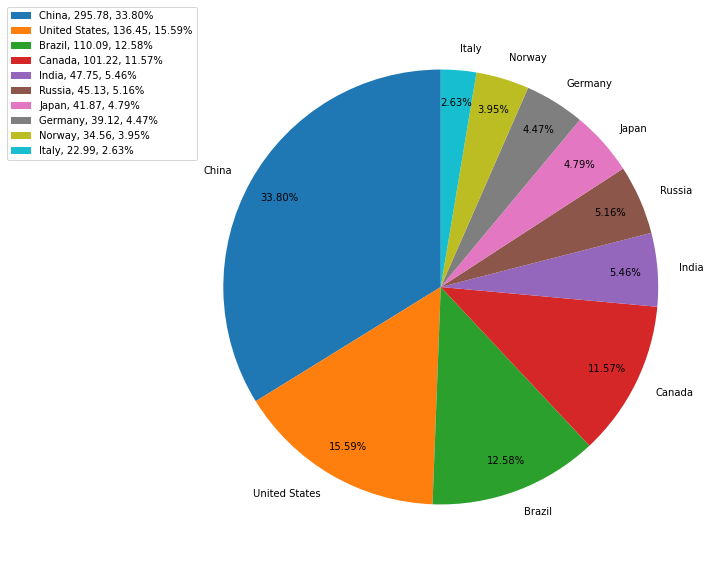

In [26]:
renew_n = top10re_df['renewable']
renew_country = top10re_df['Country name']
renew_total = sum(renew_n)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(renew_n, labels=renew_country, autopct='%1.2f%%', pctdistance=0.85, startangle=90)
#ax1.axis('equal')
plt.legend(
    bbox_to_anchor=(0.06,1.025),
    loc='best',
    labels=['%s, %1.2f, %1.2f%%' % (
    l, i, (float(i)/renew_total)*100) for l,i in zip(renew_country, renew_n)]
)
plt.show()

In [27]:
renew_n

29     295.777719
147    136.450829
19     110.087135
25     101.224424
59      47.751933
115     45.133087
67      41.867321
49      39.122300
104     34.560369
65      22.991880
Name: renewable, dtype: float64

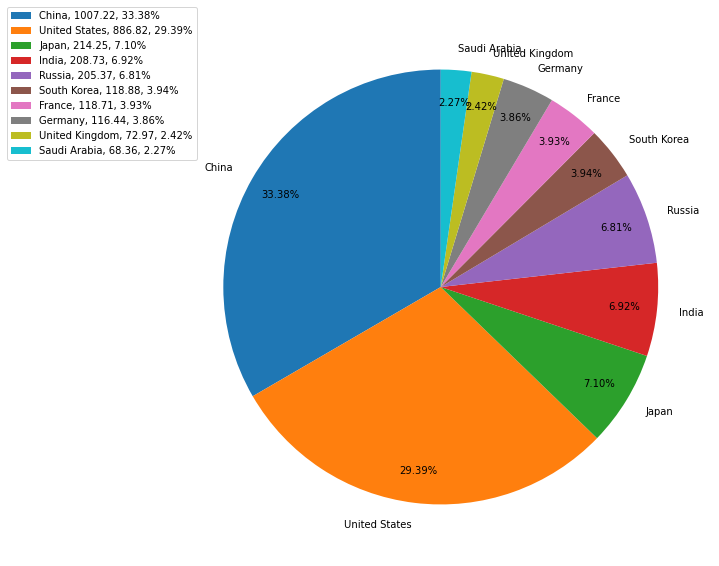

In [28]:
non_n = top10non_df['non_renewable']
non_country = top10non_df['Country name']
non_total = sum(non_n)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(non_n, labels=non_country, autopct='%1.2f%%', pctdistance=0.85, startangle=90)
#ax1.axis('equal')
plt.legend(
    bbox_to_anchor=(0.06,1.025),
    loc='best',
    labels=['%s, %1.2f, %1.2f%%' % (
    l, i, (float(i)/non_total)*100) for l,i in zip(non_country, non_n)]
)
plt.show()
#china actually uses a lot of renewable energy 

In [29]:
top10cont = list(set(top10non_df['Country name']))
top10_df = master_df.loc[master_df['Country name'].isin(top10cont)]

In [30]:
#[[j for j in top10_df['Country name']==i] for i in top10_df['Country name']]
#for i in top10_df['Country name']:
[i for i in top10_df[top10_df['Country name']=='China']['Country name']]

['China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China']

In [33]:
items = list(top10_df['Country name'])
itemsList = list(dict.fromkeys(items))

top10_df['score'] = top10_df['renewable']/top10_df['non_renewable']

dummy2={}
for i in itemsList:
    j=i.replace(" ", "")
    dummy2["%sScore" %j] = top10_df[top10_df['Country name']==i]['score']

globals().update(dummy2)

f_oneway(ChinaScore,
 FranceScore,
 GermanyScore,
 IndiaScore,
 JapanScore,
 RussiaScore,
 SaudiArabiaScore,
 SouthKoreaScore,
 UnitedKingdomScore,
 UnitedStatesScore)

F_onewayResult(statistic=16.487235844575395, pvalue=3.322628243758738e-18)

In [34]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=top10_df['score'],
                          groups=top10_df['Country name'],
                          alpha=0.05)

#display results
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
         China         France  -0.0895 0.3514 -0.2107  0.0318  False
         China        Germany   0.0857 0.4167 -0.0356  0.2069  False
         China          India  -0.0485    0.9 -0.1698  0.0727  False
         China          Japan  -0.0749 0.5949 -0.1961  0.0464  False
         China         Russia   -0.057 0.8808 -0.1783  0.0643  False
         China   Saudi Arabia  -0.2768  0.001 -0.4002 -0.1534   True
         China    South Korea  -0.2503  0.001 -0.3716 -0.1291   True
         China United Kingdom  -0.0223    0.9 -0.1436  0.0989  False
         China  United States  -0.1212 0.0503 -0.2424  0.0001  False
        France        Germany   0.1751  0.001  0.0539  0.2964   True
        France          India   0.0409    0.9 -0.0803  0.1622  False
        France          Japan   0.

In [ ]:
dummy=[]
for j in itemsList:
    dummy.append([i for i in top10_df[top10_df['Country name']==j]['Country name']])
dummy